<a href="https://colab.research.google.com/github/vasudevan-gomathy/dataanalysis_guvi/blob/main/dataanalysis_guvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [4]:
dataset1 = pd.read_csv('/content/college_1.csv')
dataset2 = pd.read_csv('/content/college_2.csv')


In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               84 non-null     object 
 1   python             84 non-null     float64
 2   mysql              84 non-null     float64
 3   Previous Geekions  84 non-null     int64  
 4   CodeKata Score     84 non-null     int64  
 5   Department         84 non-null     object 
 6   Rising             84 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.7+ KB


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    35 non-null     object
 1   python                  35 non-null     int64 
 2   python_en               35 non-null     int64 
 3   mysql                   35 non-null     int64 
 4   computational_thinking  35 non-null     int64 
 5   Previous Geekions       35 non-null     int64 
 6   CodeKata Score          35 non-null     int64 
 7   Department              35 non-null     object
 8   Rising                  35 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


In [7]:
dataset = pd.concat([dataset1, dataset2])

In [ ]:
dataset.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [ ]:
d1 = dataset.loc[dataset['CodeKata Score']>15000]
d1.to_csv('Exceeded expectations.csv')

In [ ]:
d2 = dataset.loc[(dataset['CodeKata Score']>10000) & (dataset['CodeKata Score']<15000)]
d2.to_csv('Reached_expectations.csv')

In [ ]:
d3 = dataset.loc[(dataset['CodeKata Score']>7000) & (dataset['CodeKata Score']<10000)]
d3.to_csv('Needs_Improvement.csv')

In [ ]:
d4 = dataset.loc[dataset['CodeKata Score']<7000]
d4.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [ ]:
avg_1 = dataset[['Previous Geekions']].mean()
avg_2 = dataset[['CodeKata Score']].mean()
print(avg_1, avg_2)


Previous Geekions    3842.352941
dtype: float64 CodeKata Score    4051.764706
dtype: float64


###### No of students participated 

In [ ]:
dataset[['Name']].count()

Name    119
dtype: int64

###### #Average completion of python course or my_sql or python english or computational thinking

In [ ]:
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


python                      54.352941
mysql                       23.500000
Previous Geekions         3842.352941
CodeKata Score            4051.764706
Rising                     209.411765
python_en                   29.657143
computational_thinking       2.200000
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [ ]:
dataset.nlargest(3, 'Previous Geekions')['Name']

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [ ]:
dataset.nlargest(3, 'CodeKata Score')['Name']

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

Department
Computer Science and Engineering             5079.761905
Electronics and Communication Engineering    2777.820513
Electronics and Electrical Engineering       3164.705882
Name: CodeKata Score, dtype: float64


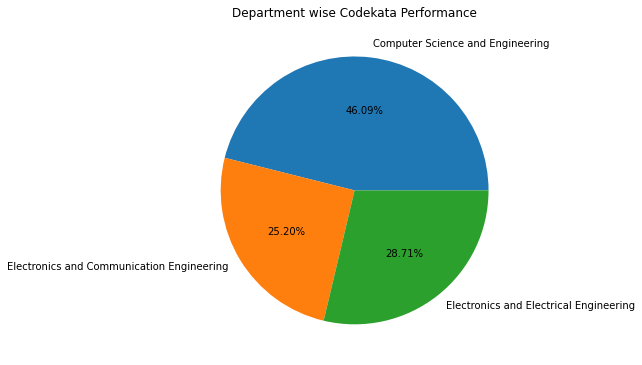

In [33]:
viz = dataset.groupby('Department')['CodeKata Score'].mean()
department = dataset.Department.unique()
plt.figure(figsize=(6,10))
plt.pie(viz, labels = department, autopct = '%0.2f%%')
plt.title('Department wise Codekata Performance')
plt.show
print(viz)

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

Text(0.5, 1.0, 'Computer Science and Engineering Toppers')

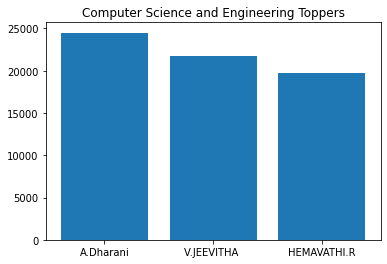

In [29]:
comp = dataset[dataset.Department == 'Computer Science and Engineering'].nlargest(3, 'CodeKata Score')
comp_x = comp['Name']
comp_y = comp['CodeKata Score']
plt.bar(comp_x,comp_y)
plt.title('Computer Science and Engineering Toppers')

Text(0.5, 1.0, 'Electronics and Communication Engineering Toppers')

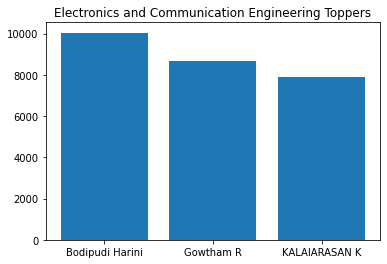

In [30]:
comp = dataset[dataset.Department == 'Electronics and Communication Engineering'].nlargest(3, 'CodeKata Score')
comp_x = comp['Name']
comp_y = comp['CodeKata Score']
plt.bar(comp_x,comp_y)
plt.title('Electronics and Communication Engineering Toppers')

Text(0.5, 1.0, 'Electronics and Electrical Engineering Toppers')

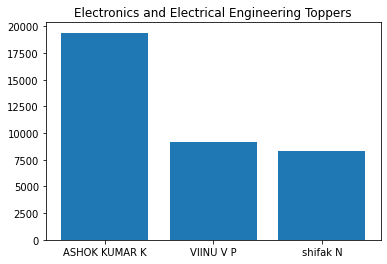

In [31]:
comp = dataset[dataset.Department == 'Electronics and Electrical Engineering'].nlargest(3, 'CodeKata Score')
comp_x = comp['Name']
comp_y = comp['CodeKata Score']
plt.bar(comp_x,comp_y)
plt.title('Electronics and Electrical Engineering Toppers')